> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>In this project, I analyzez a dataset and communicated my findings about it.
I used the Python libraries NumPy, Pandas, and
Matplotlib to do the analysis. This dataset collects information from 100k medical appointments
in Brazil and is focused on
the question of whether or 
not patients show up for 
their appointment. A number of 
characteristics about the patient 
are included in each row.

>● ‘ScheduledDay’ tells us on what day the patient set up their appointment. 


>● ‘Neighborhood’ indicates the location of the hospital. 


>● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


>● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up
### Dataset Description 

>This dataset collects information from 100k medical appointments
in Brazil and is focused on
the question of whether or 
not patients show up for 
their appointment


### Question(s) for Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
Did Age, regardless of age_group and sex, determine the patients missing the Appointments ?
How many Female and male of different Age Group in the Dataset missed the Appointments ?
Did women and children preferred to attend their appointments ?
Did the Scholarship of the patients helped in the attendence of their appointments?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [ ]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the repor, we will load in the data, check for cleanliness, then tirm and clean dataset for analysis.


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [22]:
#exploring the shape of data
df.shape

(110527, 14)

In [23]:
#check for duplication
df.duplicated().sum()

0

In [24]:
#check number of unique value
df['PatientId'].nunique()

62299

In [25]:
#check sum of duplicated patient Ids
df['PatientId'].duplicated().sum()

48228

In [26]:
#check the number of duplicated patient Ids and no show
df.duplicated(['PatientId','No-show']).sum()

38710

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [28]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [29]:
mask = df.query('Age=="-1"')
mask

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [30]:
#removing -1
df.drop(index=99832,inplace = True)

In [31]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06      37.089219       0.098266   
std    2.560943e+14   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [32]:
#correction of column name
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No_show  
0         0           0        0             0      No  
1         0           0        0      

In [33]:
#removing duplicate Ids with duplicate status, leaving the duplicated Ids if they differ in the showing status
#as the same paitanet may have several appoinments, attend same and absent from other
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [34]:
#removing unnesscary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

  Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handcap  SMS_received No_show  
0           0        0             0      No  
1           0        0             0      No  
2           0        0             0      No  
3           0        0             0      No  
4           0        0             0      No  

<a id='eda'></a>
## Exploratory Data Analysis

> Now we have trimmed and cleaned the data, ready to move on exploration Computing statistica and creating visualization with goal of addressing the reserach questions.


### General look

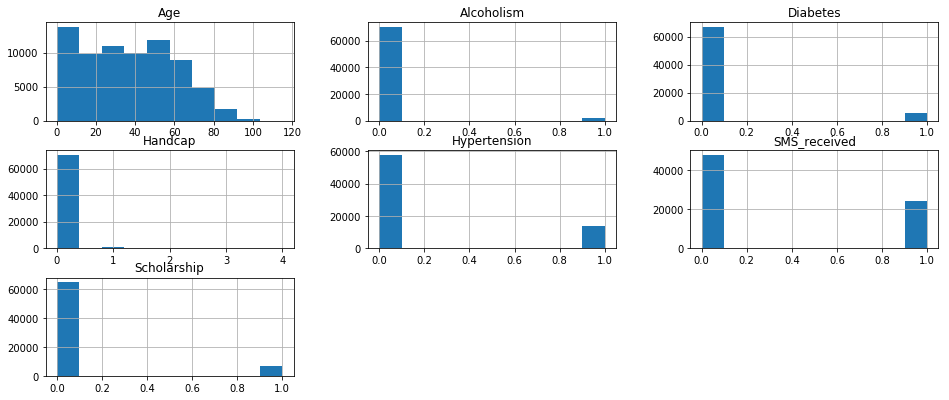

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,6.5));

In [36]:
#dividing the patients to 2 group show and not show
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [37]:
df[show].mean(),df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Investigation for the influencing factors on the attendance rate

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

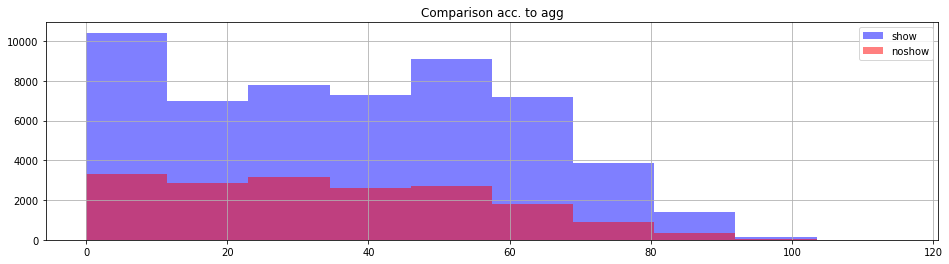

In [38]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#dose age affect attendacne 
def attendance(df,col_name,attendance,absent):# setting
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
    plt.legend();
    plt.title('Comparison acc. to agg')
    plt.xlable('Age')
    plt.xlable('Patients Number');
attendance(df,'Age',show,noshow)
    
    


Text(0,0.5,'Mean age')

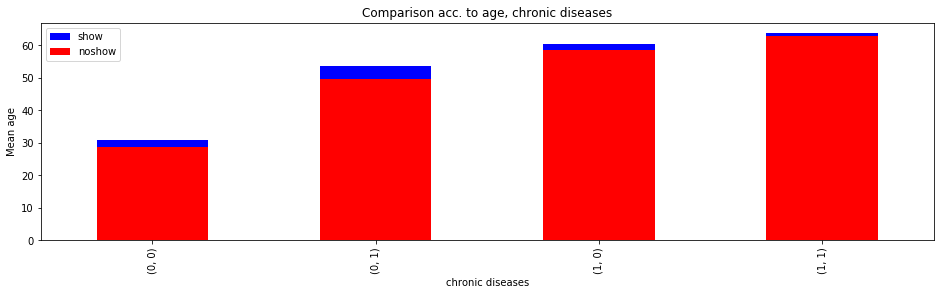

In [39]:
#does age and chronci aiseases affect the attaendance togather
plt.figure(figsize=[16,4]) #setting the figuer size
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age')

In [40]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

In [43]:
#what is the percentage of sexes attending?
def attendance(df,col_name,attendance,absent):# setting
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Comparison between attendances by gender')
    plt.xlable('Gender')
    plt.xlable('Patients Number');
attendance(df,'Gender',show,noshow)

OptionError: "No such keys(s): 'compute.use_numexpr'"

In [44]:
#what is the percentage of sexes attending?
def attendance(df,col_name,attendance,absent):# setting
    plt.figure(figsize=[12,4])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Comparison between attendances by gender')
    plt.xlable('Gender')
    plt.xlable('Patients Number');
attendance(df,'Gender',show,noshow)

OptionError: "No such keys(s): 'compute.use_numexpr'"

Text(0,0.5,'Mean age')

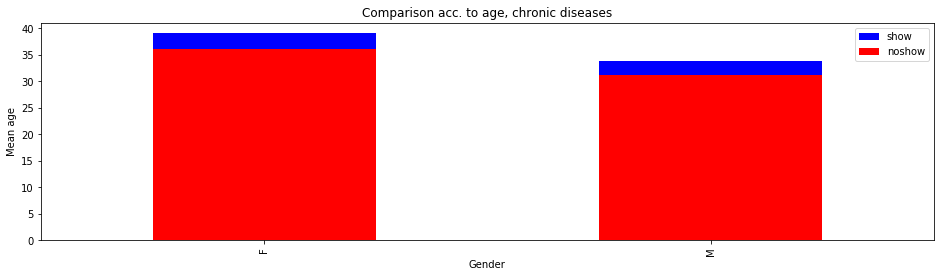

In [45]:
#does age and chronci aiseases affect the attaendance togather
plt.figure(figsize=[16,4]) #setting the figuer size
df[show].groupby(['Gender']).Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Gender']).Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('Gender')
plt.ylabel('Mean age')

In [47]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),
      df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

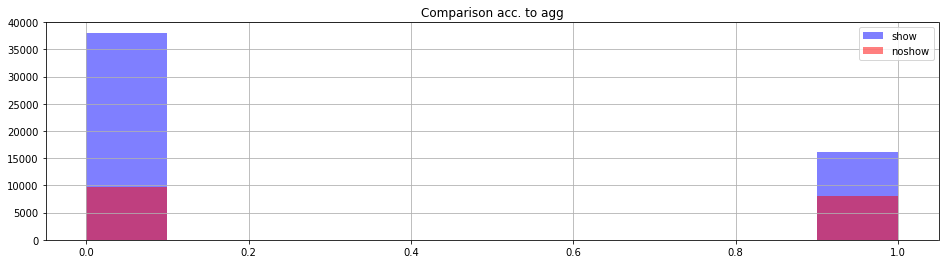

In [50]:
# does reciving SMS affect the attendace 
def attendance(df,col_name,attendance,absent):# setting
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
    plt.legend();
    plt.title('Comparison acc. to agg')
    plt.xlable('SMS')
    plt.xlable('Patients Number');
attendance(df,'SMS_received',show,noshow)
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

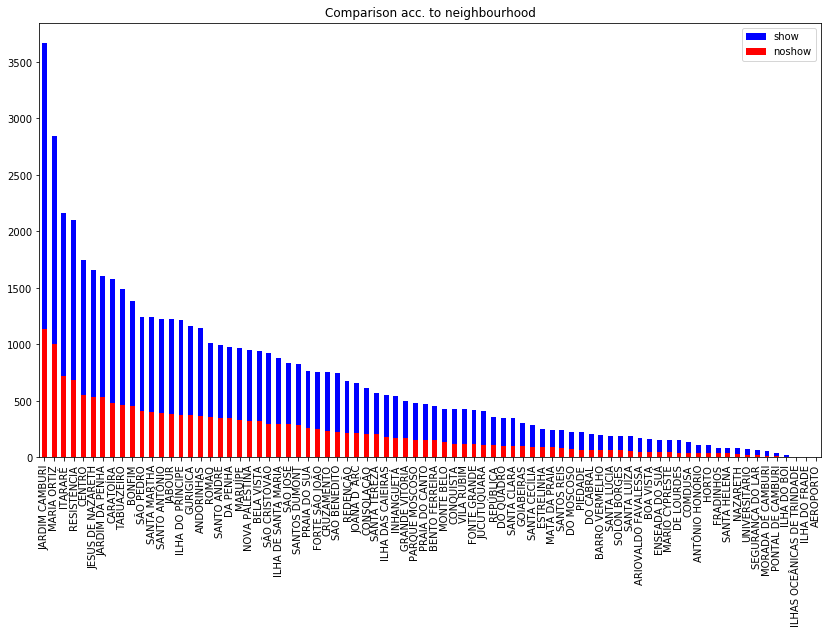

In [51]:
#does neigbbourhood affect the attendance
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('Comparison acc. to neighbourhood')
plt.xlable('Neighbourhood')
plt.xlable('Patients Number');

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

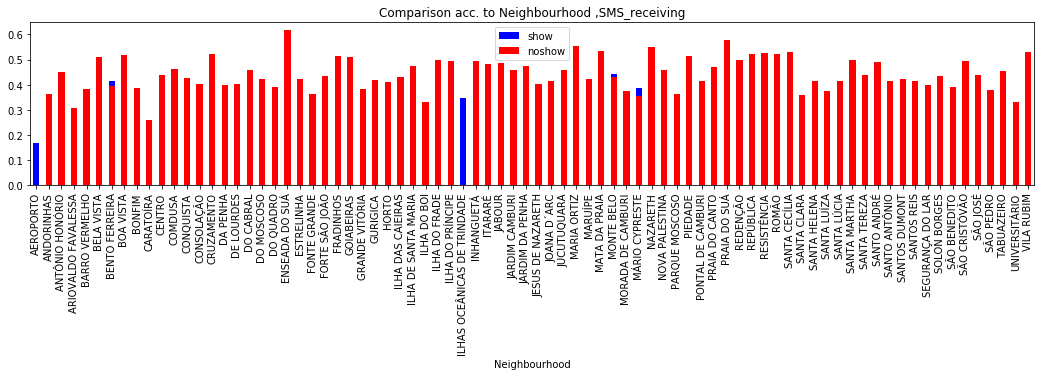

In [52]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('Comparison acc. to Neighbourhood ,SMS_receiving')
plt.xlable('Neighbourhood')
plt.xlable('Patients Number');

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

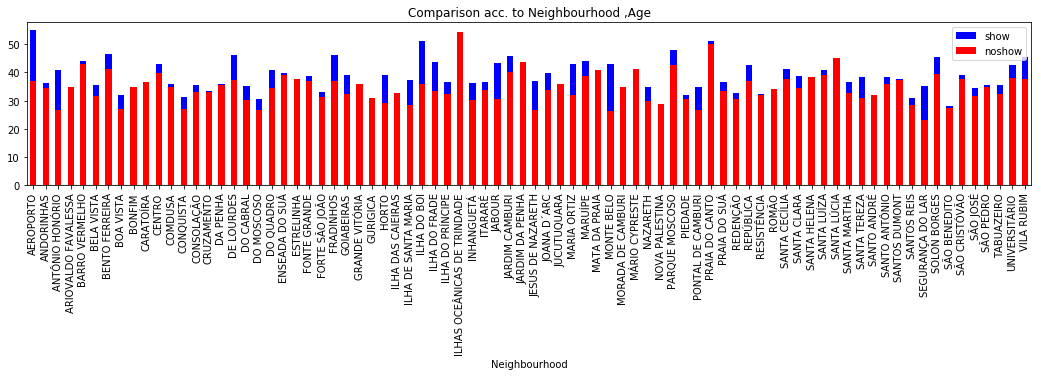

In [54]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('Comparison acc. to Neighbourhood ,Age')
plt.xlable('Neighbourhood')
plt.xlable('Mean Age');

<a id='conclusions'></a>
## Conclusions

Finally, after analysis the dataset Neighbourhood has a great effect on attendance or not, JARDIM CAMBURI has the greatest showing rate.

Number of showing patitents from specific neighbourhood affected by receving SMS and Ages.

Age has a clear influence on the showing rate Ages 0:8 are the most showing (parents taking care of their kids) then from 45:55 and the least attending are whom above 65 years old.

Number of showing patients without receiving SMS is greater than showing  with receiving SMS, which means that we need to revist our sms compaghin.


## Limitations

There is no clear correlation between showing and gender, chronic diseases, enrollement in the welfare program 



In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0